1/1 [==============================] - 0s 142ms/step


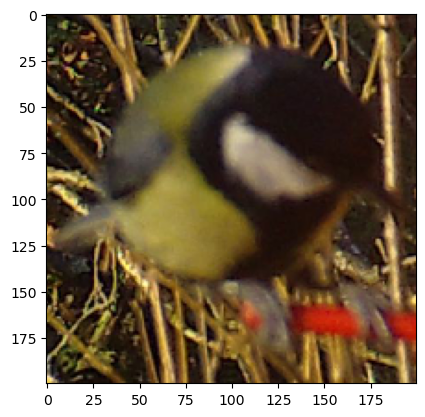

In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model 
import os, pathlib
import numpy as np
import pandas as pd

# Load model architechture and weights 
new_model = load_model("Species_Classification_Model.h5")

# Define image size MUST BE SET TO (200,200)
image_size = (200,200)

# Create a list to store the species names, to be used later when creating a species match dataframe
spp_list =[]

# Load test image name (Image must be in the same directory as this file)
test_image = "test_1"

# using keras.preprocessing.load_img load the test image 
img = keras.preprocessing.image.load_img(
test_image+".jpg",target_size = image_size)

# Display the loaded image
plt.imshow(img)

# reformat image to the same format as those used to train the image classification model
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array,0)

# run the prediction model loaded earlier on the test image. 
pred = new_model.predict(img_array) 

# Save probaility output to a list 
list = pred.flatten()

# Multiply prediciton output by 100 to create a percentage 
probability = list*100

# Set file path to where all the species name directory  
root_dir = pathlib.Path("images/raw_images")

# Loop through root_directory and add all of the species into spp_list created at the start.
for species in os.listdir(root_dir):
    spp_list.append(species)

# Create a dataframe containing the probability scores and the list of species
df = pd.DataFrame(probability,spp_list,columns=["Species Match (%)"])

# Sort the dataframe by species match with the highest match score at the top 
df_sorted = df.sort_values(by ="Species Match (%)", ascending = False).round(1)

# Save the dataframe to the name of the test image followed by .csv
df_sorted.to_csv(f"{test_image}.csv")